<a href="https://colab.research.google.com/github/jessie040718/CVFX-homework-4/blob/master/HW4_team7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 用cv2.xfeatures2d需要

In [0]:
!pip install opencv_python==3.4.2.16 
!pip install opencv-contrib-python==3.4.2.16

In [0]:
# Import package for feature matching 
# Connect to Google Drive from youtself
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
# Ensure the image is exists
!ls "/content/drive/My Drive/cvfx"

01.jpg	02.jpg	1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  Hw4照片  mod.jpg  orig.jpg


### INPUT
把image讀近來，image大約都3000x4000所以順手resize成十分之一倍。

imread的第二個參數助教給0但是shape印出來只有一個channel，改成這樣才有3個channel。

之後的resize從shape上看來沒什麼改變，但是沒加的話plt的時候顏色會怪怪。

In [0]:
# Read image
img1 = cv2.resize(cv2.imread('/content/drive/My Drive/cvfx/01.jpg', cv2.IMREAD_COLOR), None, fx=0.1, fy=0.1)
img2 = cv2.resize(cv2.imread('/content/drive/My Drive/cvfx/02.jpg', cv2.IMREAD_COLOR), None, fx=0.1, fy=0.1)
img1 = img1[...,::-1]
img2 = img2[...,::-1]

In [0]:
# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [0]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

### MATCH採樣
相信分數最高的前15%應該足夠好。

In [0]:
# Take the best 15% matches.
GOOD_MATCH_PERCENT = 0.15
goodMatch = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:goodMatch]

### 拿P_20190416_125344跟P_20190416_125351

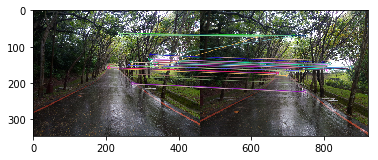

(<matplotlib.image.AxesImage at 0x7fe817ca4fd0>, None)

In [0]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)
plt.imshow(img3),plt.show()

### Alignment
這個情況是黑邊在右邊。

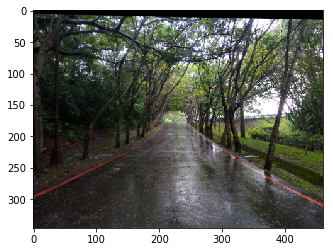

(<matplotlib.image.AxesImage at 0x7fe813bb5e10>, None)

In [0]:
# Extract location of good matches
points1 = np.zeros((goodMatch, 2), dtype=np.float32)
points2 = np.zeros((goodMatch, 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = kp1[match.queryIdx].pt
  points2[i, :] = kp2[match.trainIdx].pt

# Find homography
h, _ = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use homography
height, width, channels = img2.shape
im1Reg = cv2.warpPerspective(img1, h, (width, height))

plt.imshow(im1Reg), plt.show()

# xfeature2d SIFT

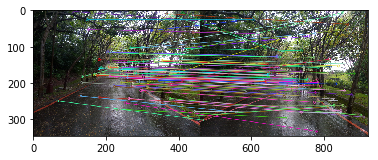

(<matplotlib.image.AxesImage at 0x7fe813b34fd0>, None)

In [0]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Take the best 15% matches.
GOOD_MATCH_PERCENT = 0.15
goodMatch = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:goodMatch]

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)
plt.imshow(img3),plt.show()

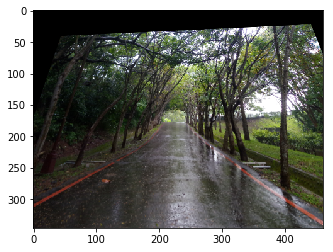

(<matplotlib.image.AxesImage at 0x7fe813b0c048>, None)

In [0]:
# Extract location of good matches
points1 = np.zeros((goodMatch, 2), dtype=np.float32)
points2 = np.zeros((goodMatch, 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = kp1[match.queryIdx].pt
  points2[i, :] = kp2[match.trainIdx].pt

# Find homography
h, _ = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use homography
height, width, channels = img2.shape
im1Reg = cv2.warpPerspective(img1, h, (width, height))

plt.imshow(im1Reg), plt.show()

# SURF

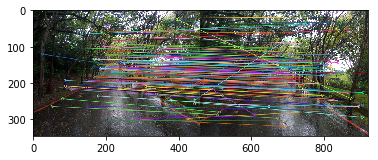

(<matplotlib.image.AxesImage at 0x7fe813a74c88>, None)

In [0]:
# Initiate SURF detector
surf = cv2.xfeatures2d.SURF_create()

# find the keypoints and descriptors with SURF
kp1, des1 = surf.detectAndCompute(img1,None)
kp2, des2 = surf.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Take the best 15% matches.
GOOD_MATCH_PERCENT = 0.15
goodMatch = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:goodMatch]

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)
plt.imshow(img3),plt.show()

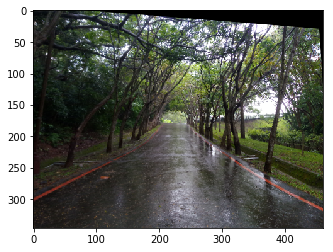

(<matplotlib.image.AxesImage at 0x7fe813a44b00>, None)

In [0]:
# Extract location of good matches
points1 = np.zeros((goodMatch, 2), dtype=np.float32)
points2 = np.zeros((goodMatch, 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = kp1[match.queryIdx].pt
  points2[i, :] = kp2[match.trainIdx].pt

# Find homography
h, _ = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use homography
height, width, channels = img2.shape
im1Reg = cv2.warpPerspective(img1, h, (width, height))

plt.imshow(im1Reg), plt.show()